In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pickle
import numpy as np

# Table 2

In [8]:
def rank (df_path):
    df=pd.read_csv(df_path)
    df=df.rename(columns={'r2_fold':'r2_cv_mean'})

    for i,value in df.iterrows():
        df.loc[i,'n_groups']=len(value['feature'].split('+'))
        df.loc[i,'missing']='+'.join(list(set(names).difference(set(df.loc[i,'feature'].split('+')))))

    rank_df_full=pd.DataFrame(df[(df['fold']==0)&(df['audio_type']=='full')].groupby(['feature','n_groups','trait','audio_type','missing'])['r2_cv_mean'].mean().sort_values(ascending=False)).reset_index()
    rank_df_speech=pd.DataFrame(df[(df['fold']==0)&(df['audio_type']=='speech')].groupby(['feature','n_groups','trait','audio_type','missing'])['r2_cv_mean'].mean().sort_values(ascending=False)).reset_index()

    
    s1=rank_df_speech[rank_df_speech['n_groups']==1].head(1)
    s1.loc[:,'top_n_features']='top_1'
    s2=rank_df_speech[rank_df_speech['n_groups']==2].head(1)
    s2.loc[:,'top_n_features']='top_2'
    s3=rank_df_speech[rank_df_speech['n_groups']==3].head(1)
    s3.loc[:,'top_n_features']='top_3'
    s_best=rank_df_speech.head(1)
    s_best.loc[:,'top_n_features']='best'
    f1=rank_df_full[rank_df_full['n_groups']==1].head(1)
    f1.loc[:,'top_n_features']='top_1'
    f2=rank_df_full[rank_df_full['n_groups']==2].head(1)
    f2.loc[:,'top_n_features']='top_2'
    f3=rank_df_full[rank_df_full['n_groups']==3].head(1)
    f3.loc[:,'top_n_features']='top_3'
    f_best=rank_df_full.head(1)
    f_best.loc[:,'top_n_features']='best'

    rank=pd.concat([s1,s2,s3,s_best,f1,f2,f3,f_best])

    return rank

names=['sr',
 'frequency',
 'energy',
 'spectral',
 'spectral_voiced',
 'unvoiced',
 'temporal']

rank_o=rank('data/Table_2/importance_final_o/results.csv')
rank_c=rank('data/Table_2/importance_final_c/results.csv')
rank_e=rank('data/Table_2/importance_final_e/results.csv')
rank_a=rank('data/Table_2/importance_final_a/results.csv')
rank_n=rank('data/Table_2/importance_final_n/results.csv')

final_rank=pd.concat([rank_o,rank_c,rank_e,rank_a,rank_n])

final_rank_full=pd.melt(final_rank[final_rank['audio_type']=='full'], id_vars=['trait','top_n_features','feature'], value_vars='r2_cv_mean').drop(columns='variable').rename(columns={'value':'r2'})
final_rank_speech=pd.melt(final_rank[final_rank['audio_type']=='speech'], id_vars=['trait','top_n_features','feature'], value_vars='r2_cv_mean').drop(columns='variable').rename(columns={'value':'r2'})

/tmp/ipykernel_4297/3487360905.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_best.loc[:,'top_n_features']='best'
/tmp/ipykernel_4297/3487360905.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_best.loc[:,'top_n_features']='best'
/tmp/ipykernel_4297/3487360905.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [9]:
final_rank_speech

,trait,top_n_features,feature,r2
0,openness,top_1,spectral,0.117807
1,openness,top_2,sr+spectral,0.186648
2,openness,top_3,sr+frequency+spectral_voiced,0.214292
3,openness,best,sr+frequency+energy+spectral+spectral_voiced+t...,0.217543
4,conscientiousness,top_1,frequency,0.065973
5,conscientiousness,top_2,sr+frequency,0.175263
6,conscientiousness,top_3,sr+frequency+energy,0.192443
7,conscientiousness,best,sr+frequency+energy+spectral_voiced+temporal,0.197318
8,extraversion,top_1,frequency,0.126566
9,extraversion,top_2,sr+frequency,0.184443


# Figure 1

Random forest results. Features: egemaps y RF

In [10]:
Figure_1_1=pd.read_csv('data/Figure_1_1/results_bootstrapping.csv')
Figure_1_2=pd.read_csv('data/Figure_1_2/results_bootstrapping.csv')

In [11]:
feature_comparison_all_vs_speech=pd.concat([Figure_1_1,Figure_1_2])

In [12]:
with open ('data/final_exps.pkl','rb') as file:
    final_results=pickle.load(file)

dict_={'w2v2_official':'DNN_w2v2-full wav-original',
    'w2v2':'DNN_w2v2-full wav-stratified',
    'so_w2v2_dnn':'DNN_w2v2-speech_only-stratified',    
    'rf_w2v2':'RF_w2v2-full wav-stratified',
    'rf_w2v2_sr':'RF_w2v2+sr-full wav-stratified',
    'rf_w2v2_sr_egemaps':'RF_w2v2+sr+egemaps-full wav-stratified',
    'so_w2v2_rf':'RF_w2v2-speech_only-stratified',
    'so_w2v2_sr_rf':'RF_w2v2+sr-speech_only-stratified',
    'so_w2v2_sr_egemaps_rf':'RF_w2v2+sr+egemaps-speech_only-stratified',
    'rf_w2v2_lld_sr_official':'RF_w2v2+sr+egemaps-full wav-original'
    }

results=dict((dict_[key], value) for (key, value) in final_results.items())

final_df=pd.DataFrame({})
for key in results.keys():
    model_data=key.split('-')
    enaco=pd.DataFrame(results[key],columns=['extraversion','neuroticism','agreeableness','conscientiousness','openness'])
    enaco['r2_mean']=enaco.mean(axis=1)
    enaco.loc[:,'model_feature']=model_data[0]
    enaco.loc[:,'audio']=model_data[1]
    enaco.loc[:,'split']=model_data[2]
    final_df=pd.concat([final_df,enaco])
final_df['audio']=final_df['audio'].apply(lambda x: x.replace('_','-'))

In [13]:
feature_comparison_all_vs_speech=feature_comparison_all_vs_speech.rename(columns={'audio_type':'audio','r2_boot_values':'r2_mean'})
feature_comparison_all_vs_speech['audio']=feature_comparison_all_vs_speech['audio'].apply(lambda x: x.replace('full','full wav'))
feature_comparison_all_vs_speech['audio']=feature_comparison_all_vs_speech['audio'].apply(lambda x: x.replace('speech','speech-only'))
feature_comparison_all_vs_speech['model']=feature_comparison_all_vs_speech['model'].apply(lambda x: x.replace('random_forest','RF'))
feature_comparison_all_vs_speech.loc[:,'split']='stratified'
feature_comparison_all_vs_speech.loc[:,'model_feature']='RF_'+feature_comparison_all_vs_speech['feature']

In [14]:
all_results=pd.concat([final_df,feature_comparison_all_vs_speech])

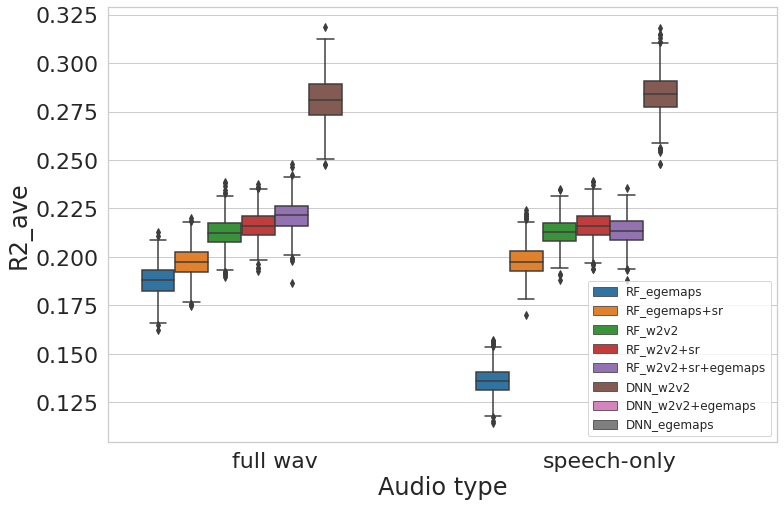

In [15]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=2)
sns.set_palette('tab10')
sns.set_style("whitegrid")
ax=sns.boxplot(data= all_results[all_results['split']=='stratified'], x='audio',y='r2_mean',hue='model_feature',
hue_order=['RF_egemaps','RF_egemaps+sr','RF_w2v2','RF_w2v2+sr','RF_w2v2+sr+egemaps','DNN_w2v2','DNN_w2v2+egemaps','DNN_egemaps'])
ax.set(xlabel='Audio type', ylabel='R2_ave')
plt.legend(loc='lower right',fontsize=12)
plt.show()

# Figure 2

(0.075, 0.22)

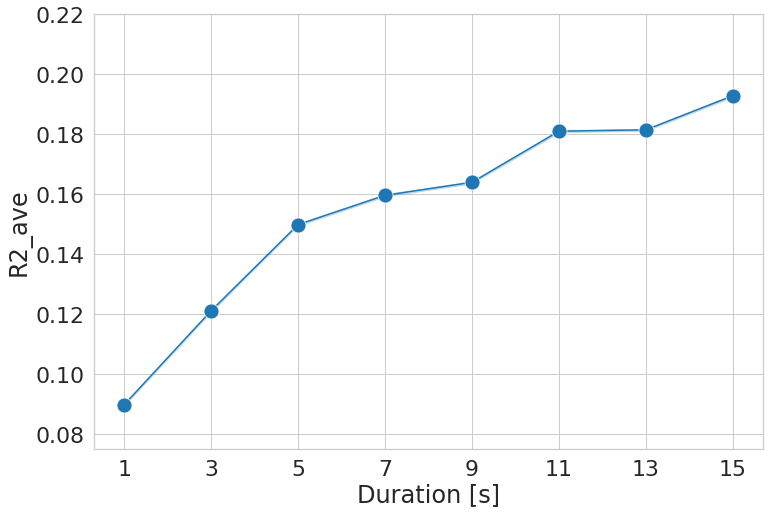

In [20]:
df_figure_3_a=pd.read_csv('data/Figure_2/results_bootstrapping.csv')
df_figure_3_a=df_figure_3_a.rename(columns={'feature':'duration'}).copy()
df_figure_3_a['duration']=df_figure_3_a['duration'].apply(lambda x: x.split('_')[-2])
df_figure_3_a.loc[:,'feature']='egemaps'

compare=df_figure_3_a.groupby(['duration','feature']).mean().reset_index()
compare_df=df_figure_3_a.loc[:,df_figure_3_a.columns.isin(['r2_boot_values','feature','duration'])]

plt.figure(figsize=(12, 8))
#sns.set(font_scale=2.5)
bar1 = sns.lineplot(data=compare_df,x="duration",  y="r2_boot_values",markers=True,marker='o',markersize=15)
#sns.set_palette('tab10')
#sns.set_style("whitegrid")
plt.ylabel('R2_ave')
plt.xlabel('Duration [s]')
plt.ylim((0.075,0.22))

# Table 1

Best Random Forest

In [63]:
best_rf_original=all_results[(all_results['split']=='original')&(all_results['model_feature']=='RF_w2v2+sr+egemaps')]

In [64]:
best_rf_original['r2_ave']=best_rf_original.mean(axis=1)

/tmp/ipykernel_4297/3804204417.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_rf_original['r2_ave']=best_rf_original.mean(axis=1)
/tmp/ipykernel_4297/3804204417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_rf_original['r2_ave']=best_rf_original.mean(axis=1)


In [65]:
rf_best_means_original=best_rf_original.groupby(['model_feature','split']).mean().reset_index()

In [66]:
rf_best_means_original

,model_feature,split,extraversion,neuroticism,agreeableness,conscientiousness,openness,r2_mean,Unnamed: 0,n_boot,seed,fold,r2_ave
0,RF_w2v2+sr+egemaps,original,0.295616,0.319312,0.200788,0.283243,0.299754,0.279743,NaN,NaN,NaN,NaN,0.279743


Best RF stratified splits

In [67]:
best_rf_strat=all_results[(all_results['split']=='stratified')&(all_results['model_feature']=='RF_w2v2+sr+egemaps')]

In [68]:
best_rf_strat['r2_ave']=best_rf_strat.mean(axis=1)

/tmp/ipykernel_4297/3718963372.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_rf_strat['r2_ave']=best_rf_strat.mean(axis=1)
/tmp/ipykernel_4297/3718963372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_rf_strat['r2_ave']=best_rf_strat.mean(axis=1)


In [69]:
rf_best_means_strat=best_rf_strat.groupby(['model_feature','split']).mean().reset_index()

In [70]:
rf_best_means_strat

,model_feature,split,extraversion,neuroticism,agreeableness,conscientiousness,openness,r2_mean,Unnamed: 0,n_boot,seed,fold,r2_ave
0,RF_w2v2+sr+egemaps,stratified,0.227848,0.259945,0.145933,0.224164,0.228708,0.21732,NaN,NaN,NaN,NaN,0.21732


Best DNN original

In [71]:
best_dnn_original=all_results[(all_results['split']=='original')&(all_results['model_feature']=='DNN_w2v2')]

In [72]:
best_dnn_original['r2_ave']=best_dnn_original.mean(axis=1)

/tmp/ipykernel_4297/3544000913.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_dnn_original['r2_ave']=best_dnn_original.mean(axis=1)
/tmp/ipykernel_4297/3544000913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dnn_original['r2_ave']=best_dnn_original.mean(axis=1)


In [73]:
dnn_best_means_original=best_dnn_original.groupby(['model_feature','split']).mean().reset_index()

In [74]:
dnn_best_means_original

,model_feature,split,extraversion,neuroticism,agreeableness,conscientiousness,openness,r2_mean,Unnamed: 0,n_boot,seed,fold,r2_ave
0,DNN_w2v2,original,0.346701,0.364346,0.224478,0.35594,0.339562,0.326205,NaN,NaN,NaN,NaN,0.326205


Best DNN stratified

In [75]:
best_dnn_strat=all_results[(all_results['split']=='stratified')&(all_results['model_feature']=='DNN_w2v2')]

In [76]:
best_dnn_strat['r2_ave']=best_dnn_strat.mean(axis=1)

/tmp/ipykernel_4297/3130343138.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_dnn_strat['r2_ave']=best_dnn_strat.mean(axis=1)
/tmp/ipykernel_4297/3130343138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dnn_strat['r2_ave']=best_dnn_strat.mean(axis=1)


In [77]:
dnn_best_means_strat=best_dnn_strat.groupby(['model_feature','split']).mean().reset_index()

In [78]:
dnn_best_means_strat

,model_feature,split,extraversion,neuroticism,agreeableness,conscientiousness,openness,r2_mean,Unnamed: 0,n_boot,seed,fold,r2_ave
0,DNN_w2v2,stratified,0.312304,0.318521,0.172389,0.322668,0.285515,0.282279,NaN,NaN,NaN,NaN,0.282279


In [79]:
table_1=pd.concat([rf_best_means_original,rf_best_means_strat,dnn_best_means_strat,dnn_best_means_original])

In [82]:
table_1

,model_feature,split,extraversion,neuroticism,agreeableness,conscientiousness,openness,r2_mean,Unnamed: 0,n_boot,seed,fold,r2_ave
0,RF_w2v2+sr+egemaps,original,0.295616,0.319312,0.200788,0.283243,0.299754,0.279743,NaN,NaN,NaN,NaN,0.279743
0,RF_w2v2+sr+egemaps,stratified,0.227848,0.259945,0.145933,0.224164,0.228708,0.217320,NaN,NaN,NaN,NaN,0.217320
0,DNN_w2v2,stratified,0.312304,0.318521,0.172389,0.322668,0.285515,0.282279,NaN,NaN,NaN,NaN,0.282279
0,DNN_w2v2,original,0.346701,0.364346,0.224478,0.355940,0.339562,0.326205,NaN,NaN,NaN,NaN,0.326205
